# pore_size_distribution

In [1]:
import porespy as ps
from IPython.display import Markdown as show
show(ps.tools.show_docstring(ps.metrics.pore_size_distribution))

---
 ## Documentation for ``pore_size_distribution``
 ---
**<span style="color:purple">pore&#95;size&#95;distribution</span>_(im, bins=10, log=True, voxel_size=1)_**


Calculate a pore-size distribution based on the image produced by the
``porosimetry`` or ``local_thickness`` functions.


#### Parameters
* im : <b><i>ND-array</i></b>  The array of containing the sizes of the largest sphere that overlaps
	each voxel.  Obtained from either ``porosimetry`` or
	``local_thickness``.
* bins : <b><i>scalar or array_like</i></b>  Either an array of bin sizes to use, or the number of bins that should
	be automatically generated that span the data range.
* log : <b><i>boolean</i></b>  If ``True`` (default) the size data is converted to log (base-10)
	values before processing.  This can help to plot wide size
	distributions or to better visualize the in the small size region.
	Note that you should not anti-log the radii values in the retunred
	``tuple``, since the binning is performed on the logged radii values.
* voxel_size : <b><i>scalar</i></b>  The size of a voxel side in preferred units.  The default is 1, so the
	user can apply the scaling to the returned results after the fact.

#### Returns
* result : <b><i>named_tuple</i></b>  A named-tuple containing several values:
	
	*R* or *logR* - radius, equivalent to ``bin_centers``
	
	*pdf* - probability density function
	
	*cdf* - cumulative density function
	
	*satn* - phase saturation in differential form.  For the cumulative
	saturation, just use *cfd* which is already normalized to 1.
	
	*bin_centers* - the center point of each bin
	
	*bin_edges* - locations of bin divisions, including 1 more value than
	the number of bins
	
	*bin_widths* - useful for passing to the ``width`` argument of
	``matplotlib.pyplot.bar``

#### Notes
(1) To ensure the returned values represent actual sizes you can manually
scale the input image by the voxel size first (``im *= voxel_size``)

plt.bar(psd.R, psd.satn, width=psd.bin_widths, edgecolor='k')
---

## Import packages

In [2]:
import porespy as ps
import matplotlib.pyplot as plt

ps.visualization.set_mpl_style()

## Create image:

  0%|          | 0/25 [00:00<?, ?it/s]

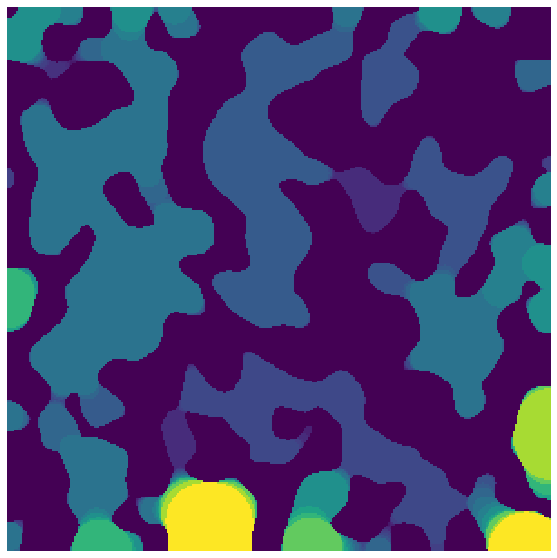

In [3]:
im = ps.generators.blobs(shape=[300, 300])
im = ps.filters.porosimetry(
    im, sizes=25, inlets=None, access_limited=True, mode="hybrid", fft=True
)

plt.figure(figsize=[10, 10])
plt.axis(False)
plt.imshow(im)

#default values:
bins = 10
log = True
voxel_size = 1

## Apply metric function:

Output is a tuple with the elements R, pdf, cdf, satn, bin_centers, bin_edges, and bin_widths

### default

In [4]:
x = ps.metrics.pore_size_distribution(im = im, bins=bins, log = log, voxel_size=voxel_size)

Plot results:

Text(0.5, 1.0, 'Bar Plot - Saturation')

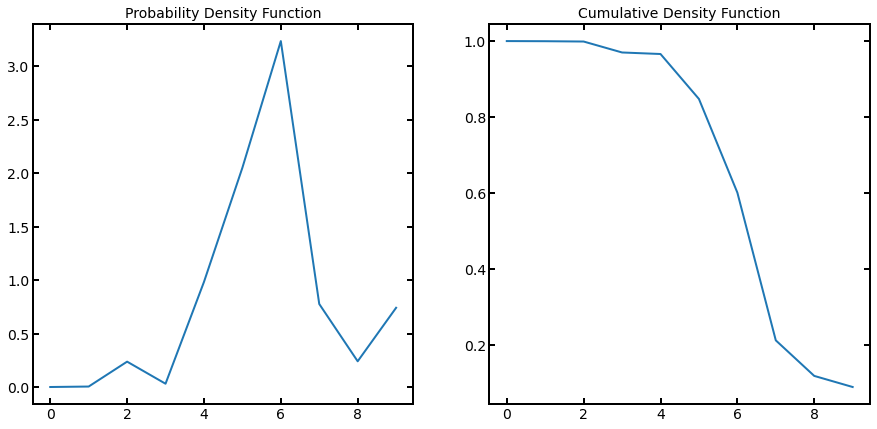

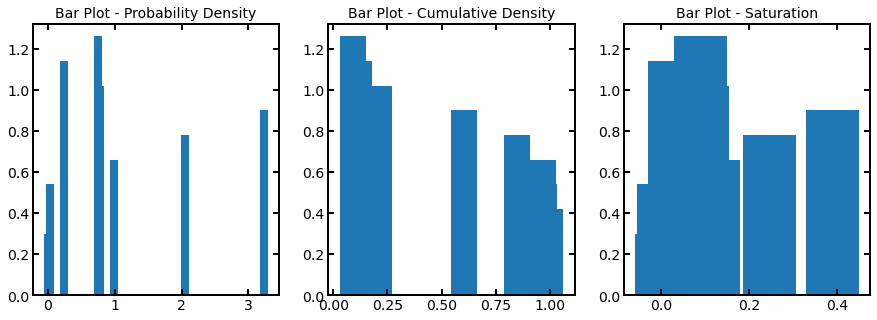

In [5]:
fig, ax = plt.subplots(1, 2, figsize=[15, 7]);
ax[0].plot(x.pdf)
ax[1].plot(x.cdf)
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")

fig, ax = plt.subplots(1, 3, figsize=[15, 5]);
ax[0].bar(x.pdf, x.bin_centers, x.bin_widths)
ax[1].bar(x.cdf, x.bin_centers, x.bin_widths)
ax[2].bar(x.satn, x.bin_centers, x.bin_widths)
ax[0].set_title('Bar Plot - Probability Density')
ax[1].set_title('Bar Plot - Cumulative Density')
ax[2].set_title('Bar Plot - Saturation')

### bins

In [6]:
x = ps.metrics.pore_size_distribution(im = im, bins=5, log = log, voxel_size=voxel_size)

Plot results:

Text(0.5, 1.0, 'Bar Plot - Saturation')

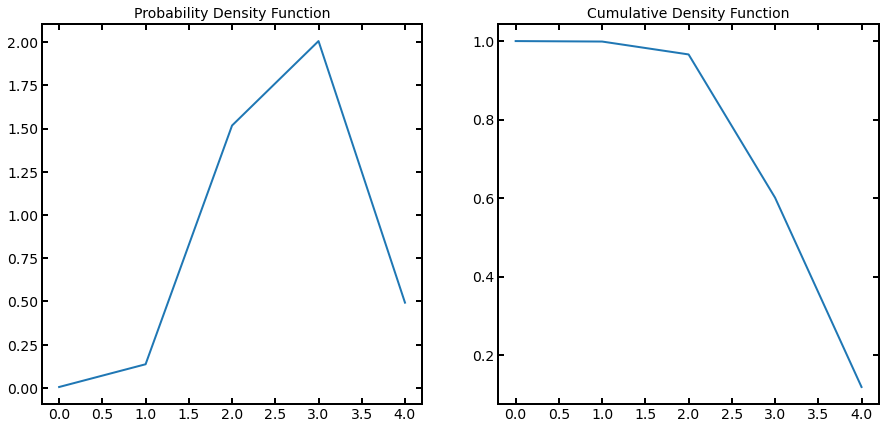

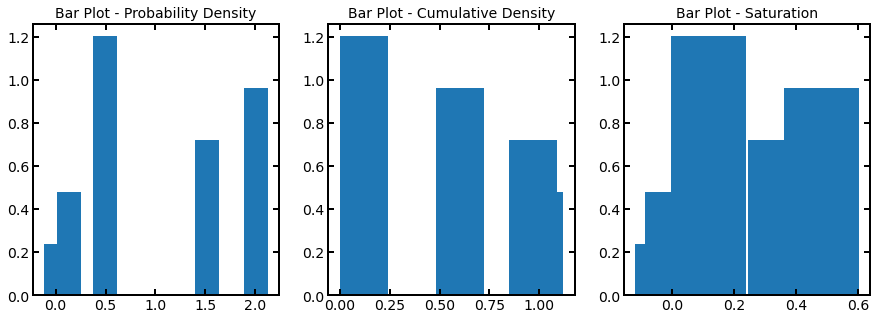

In [7]:
fig, ax = plt.subplots(1, 2, figsize=[15, 7]);
ax[0].plot(x.pdf)
ax[1].plot(x.cdf)
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")

fig, ax = plt.subplots(1, 3, figsize=[15, 5]);
ax[0].bar(x.pdf, x.bin_centers, x.bin_widths)
ax[1].bar(x.cdf, x.bin_centers, x.bin_widths)
ax[2].bar(x.satn, x.bin_centers, x.bin_widths)
ax[0].set_title('Bar Plot - Probability Density')
ax[1].set_title('Bar Plot - Cumulative Density')
ax[2].set_title('Bar Plot - Saturation')

### log

In [8]:
x = ps.metrics.pore_size_distribution(im = im, bins=bins, log = False, voxel_size=voxel_size)

Plot results:

Text(0.5, 1.0, 'Bar Plot - Saturation')

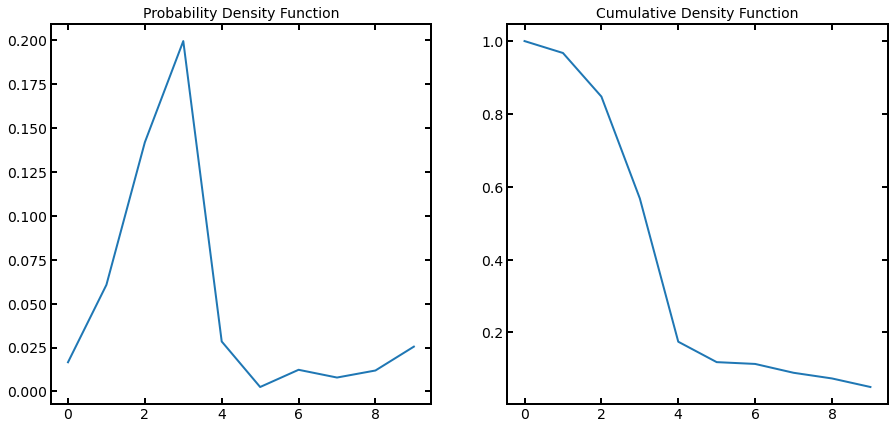

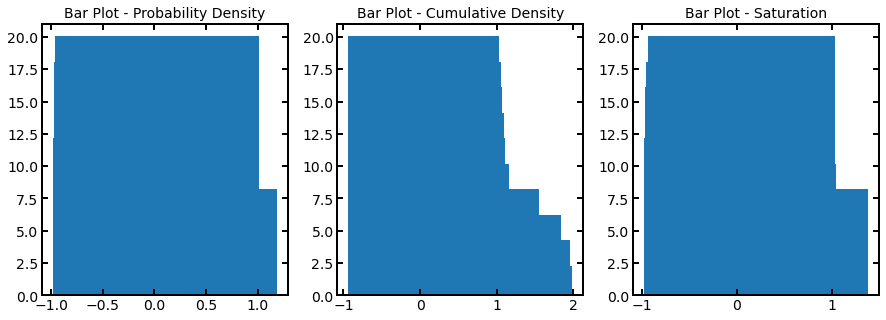

In [9]:
fig, ax = plt.subplots(1, 2, figsize=[15, 7]);
ax[0].plot(x.pdf)
ax[1].plot(x.cdf)
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")

fig, ax = plt.subplots(1, 3, figsize=[15, 5]);
ax[0].bar(x.pdf, x.bin_centers, x.bin_widths)
ax[1].bar(x.cdf, x.bin_centers, x.bin_widths)
ax[2].bar(x.satn, x.bin_centers, x.bin_widths)
ax[0].set_title('Bar Plot - Probability Density')
ax[1].set_title('Bar Plot - Cumulative Density')
ax[2].set_title('Bar Plot - Saturation')

### voxel_size

In [10]:
x = ps.metrics.pore_size_distribution(im = im, bins=bins, log = log, voxel_size=10)

Plot results:

Text(0.5, 1.0, 'Bar Plot - Saturation')

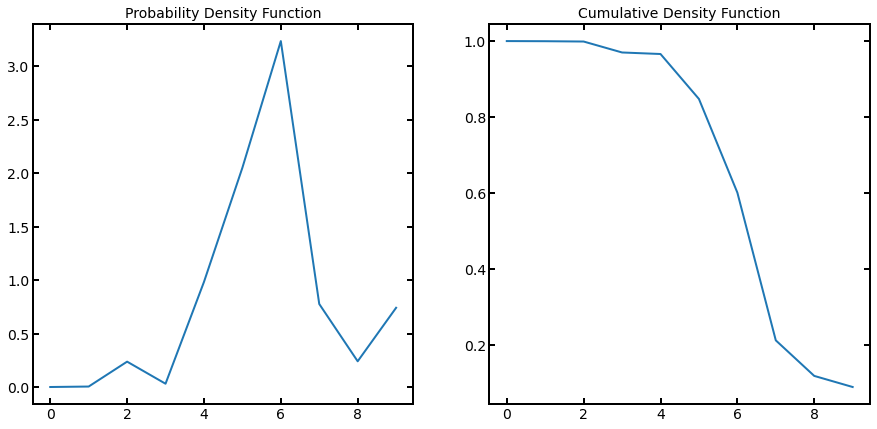

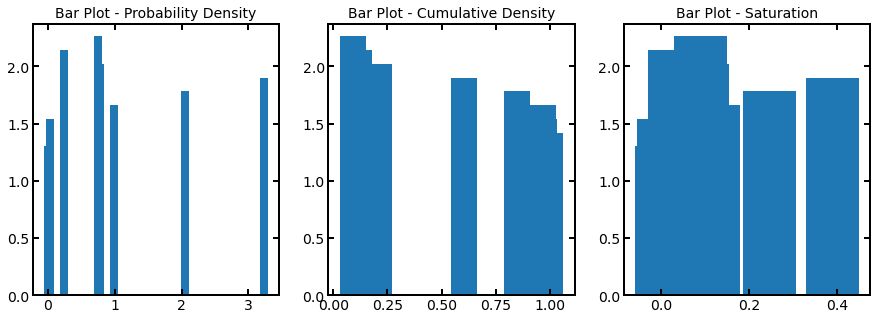

In [11]:
fig, ax = plt.subplots(1, 2, figsize=[15, 7]);
ax[0].plot(x.pdf)
ax[1].plot(x.cdf)
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")

fig, ax = plt.subplots(1, 3, figsize=[15, 5]);
ax[0].bar(x.pdf, x.bin_centers, x.bin_widths)
ax[1].bar(x.cdf, x.bin_centers, x.bin_widths)
ax[2].bar(x.satn, x.bin_centers, x.bin_widths)
ax[0].set_title('Bar Plot - Probability Density')
ax[1].set_title('Bar Plot - Cumulative Density')
ax[2].set_title('Bar Plot - Saturation')